# Perceptron Algorithm on the Wine Dataset
This notebook demonstrates the Perceptron algorithm for binary classification using the Wine dataset from sklearn.

In [116]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load and Prepare the Data

In [117]:
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [118]:
print('Feature names:', wine.feature_names)
print('Target names:', wine.target_names)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


## Implement the Perceptron Algorithm

In [119]:
class Perceptron:
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.losses = []
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.losses = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                update = self.lr * (target - y_pred)
                self.weights += update * xi
                self.bias += update
                if y_pred != target:
                    errors += 1
            self.losses.append(errors)
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return 1 if linear_output >= 0 else 0

## Train the Perceptron

In [120]:
# Train on a binary task (class 0 vs not 0)
y_train_bin = (y_train == 0).astype(int)
y_test_bin = (y_test == 0).astype(int)
perceptron = Perceptron(lr=0.01, n_iter=100)
perceptron.fit(X_train, y_train_bin)

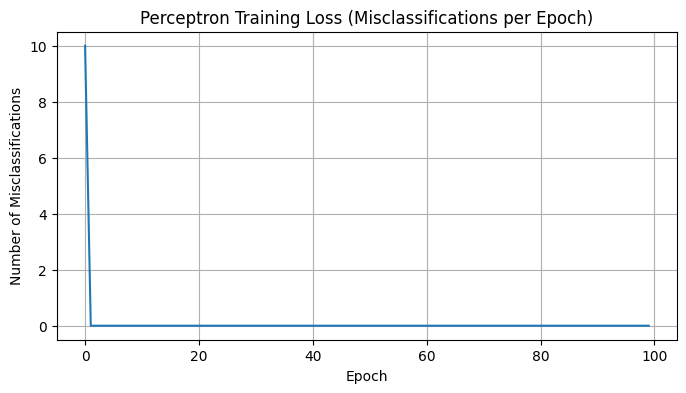

In [122]:
# Plot training loss curve
plt.figure(figsize=(8,4))
plt.plot(perceptron.losses)
plt.title('Perceptron Training Loss (Misclassifications per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()

## Evaluate the Perceptron

In [124]:
# Evaluate on test set
y_pred = [perceptron.predict(x) for x in X_test]
print('Accuracy:', accuracy_score(y_test_bin, y_pred))
print(classification_report(y_test_bin, y_pred, target_names=['not class 0', 'class 0']))





Accuracy: 1.0
              precision    recall  f1-score   support

 not class 0       1.00      1.00      1.00        22
     class 0       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



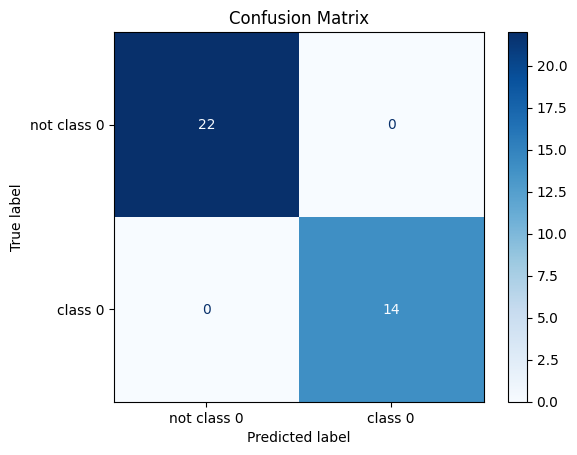

In [125]:
cm = confusion_matrix(y_test_bin, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not class 0', 'class 0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [126]:
# Show 5 example predictions
for i in range(5):
    print(f'Example {i+1}: True label = {y_test_bin[i]}, Predicted = {y_pred[i]}')


Example 1: True label = 1, Predicted = 1
Example 2: True label = 1, Predicted = 1
Example 3: True label = 0, Predicted = 0
Example 4: True label = 1, Predicted = 1
Example 5: True label = 0, Predicted = 0



## Analysis and Discussion
The perceptron is a simple linear classifier. On the Wine dataset (class 0 vs not 0), due to only having a neuron. The loss curve shows how fast the perceptron learn through the features. The accuracy was 100% which means the model label each one correctly. The result amazed me, I orignally thoought it would be somewhat close to 95%. The reason might be the class_0 standout from the dataset compare to two other class which I combined into one class for the label.